##Reading from directories and preprocessing stage

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [46]:
!ls "/content/drive/My Drive/"

 360TS_Setup_Mini.exe		       ex1data1.txt	     Scanned_20180528-1528.pdf
 AP1401-2-HW5-main_Sepehr9923004.zip   movies_complete.csv   Sepehr_kmeans
'Colab Notebooks'		       original.ipynb	     tumor_classification
 Crop_MRI_data			      'sanaati (2).zip'      tumor_dataset_for_model


In [47]:
image_directory  = "/content/drive/My Drive/tumor_classification"

In [48]:
classes = !ls "/content/drive/My Drive/tumor_classification"
print(classes[0])

glioma	meningioma  pituitary_tumor


In [49]:
#create classes ------
classes = classes[0].split()
print(classes)

['glioma', 'meningioma', 'pituitary_tumor']


In [50]:
glioma = !ls "/content/drive/My Drive/tumor_classification/glioma"
meningioma = !ls "/content/drive/My Drive/tumor_classification/meningioma"
pituitary_tumor = !ls "/content/drive/My Drive/tumor_classification/pituitary_tumor"

In [51]:
print(glioma)

['100416_1350.png     MR026175C_1993.png\tMR037458C_2726.png  MR048994_2434.png\tMR051461_2917.png', '100416_1351.png     MR026175C_1994.png\tMR037458C_2727.png  MR048994_2435.png\tMR051461_2918.png', '100416_1352.png     MR026175C_1995.png\tMR037458C_2728.png  MR048994_2436.png\tMR051461_2919.png', '100416_1353.png     MR026175C_1996.png\tMR037458C_2729.png  MR048994_2437.png\tMR051461_2920.png', '100820_122.png\t    MR026175C_2325.png\tMR038469_2145.png   MR048994_2438.png\tMR051461_2921.png', '100820_124.png\t    MR026175C_2326.png\tMR038469_2146.png   MR048994_2439.png\tMR051461_2922.png', '100820_1354.png     MR026175C_2327.png\tMR038469_2147.png   MR048994_2440.png\tMR051461_2923.png', '100820_1355.png     MR026175C_2328.png\tMR038469_2148.png   MR048994_2845.png\tMR051461B_2011.png', '100820_1356.png     MR026175C_2329.png\tMR038469_2149.png   MR048994_2846.png\tMR051461B_2012.png', '100820_1357.png     MR026175C_2330.png\tMR038469_2150.png   MR048994_2847.png\tMR051461B_2013.pn

In [52]:
contents = []
directory_contents = {}
#glioma
for content in glioma:
  c = content.split()
  contents.extend(c)
directory_contents['glioma'] = contents
contents = []

#meningioma
for content in meningioma:
  c = content.split()
  contents.extend(c)
directory_contents['meningioma'] = contents
contents = []

#glioma
for content in pituitary_tumor:
  c = content.split()
  contents.extend(c)
directory_contents['pituitary_tumor'] = contents
contents = []

In [53]:
print(len(directory_contents['pituitary_tumor']))
print(len(directory_contents['glioma']))
print(len(directory_contents['meningioma']))

930
1426
708


##Presenting the MRI images

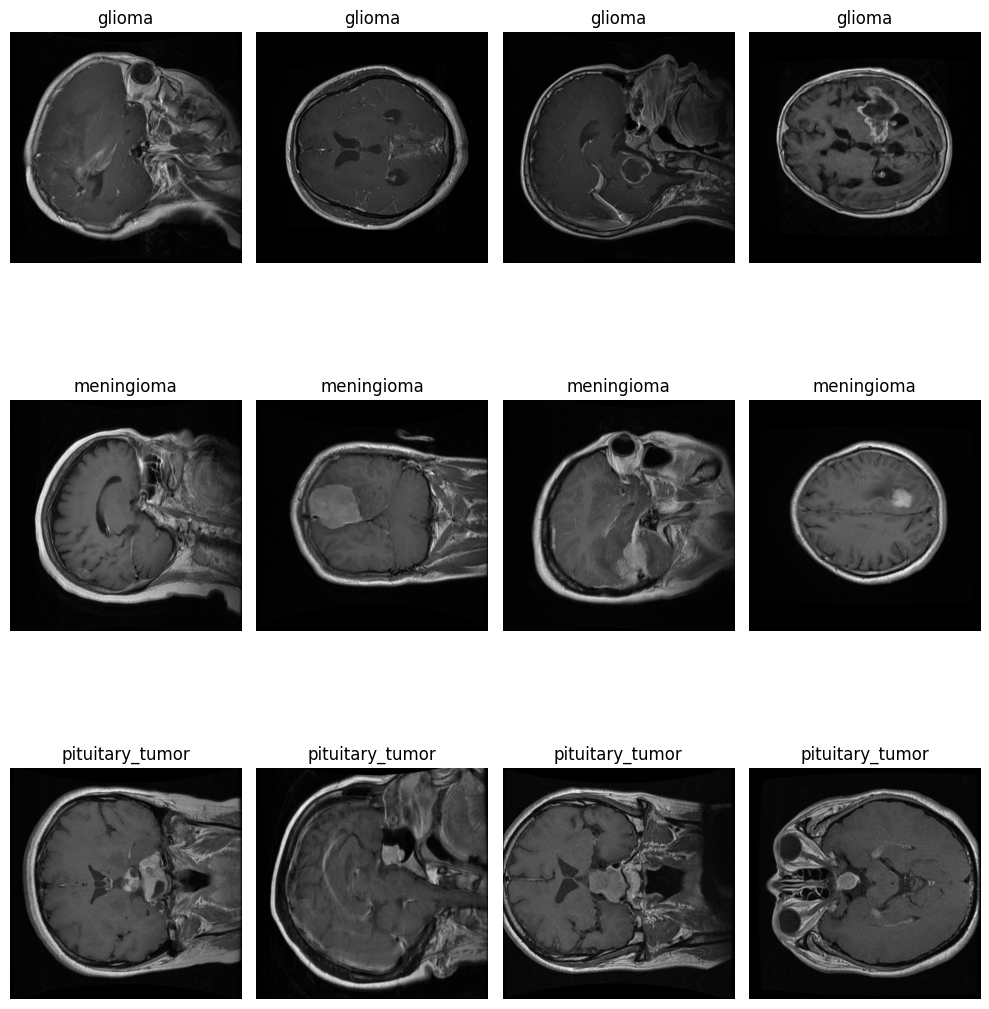

In [54]:
fig, axs = plt.subplots(3, 4, figsize=(10, 12))
for c in classes:
  random.shuffle(directory_contents[c])
  photos = directory_contents[c][:4]
  for i in range (4):
    path =  image_directory + "/" + c + "/" + photos[i]
    image = mpimg.imread(path)
    if c == "glioma":
      axs[0,i].imshow(image, cmap='gray')
      axs[0,i].axis('off')
      axs[0,i].set_title(c)
    if c == "meningioma":
      axs[1,i].imshow(image, cmap='gray')
      axs[1,i].axis('off')
      axs[1,i].set_title(c)
    if c == "pituitary_tumor":
      axs[2,i].imshow(image, cmap='gray')
      axs[2,i].axis('off')
      axs[2,i].set_title(c)
plt.tight_layout()
plt.show()


##Creating test and train directories and data for the model

In [58]:
output_dir = "/content/drive/MyDrive/tumor_dataset_for_model_adam"

# Create train and test directories
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

for class_name in classes:
    # List images
    class_path = os.path.join(image_directory, class_name)
    images = os.listdir(class_path)

    # Shuffle and select 700 images
    random.shuffle(images)
    selected_images = images[:700]

    # Split into train (500) and test (200)
    train_images = selected_images[:500]
    test_images = selected_images[500:]

    # Copy files to train/test directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

In [59]:
x = !ls "/content/tumor_dataset_for_model_adam/train/glioma"

print(x)

['100416_1350.png     MR026175C_2329.png\tMR038469_2148.png   MR048994B_1884.png\tMR051461B_2014.png', '100416_1351.png     MR026175C_2330.png\tMR038469_2149.png   MR048994B_1885.png\tMR051461B_2015.png', '100416_1352.png     MR026175C_2331.png\tMR038469_2150.png   MR048994B_1886.png\tMR051461B_2549.png', '100820_122.png\t    MR026175E_2349.png\tMR038469_2151.png   MR048994B_1888.png\tMR051461B_2550.png', '100820_124.png\t    MR026175E_2350.png\tMR038469_2682.png   MR048994B_1890.png\tMR051461B_2551.png', '100820_1354.png     MR026175E_2351.png\tMR038469_2684.png   MR048994B_1891.png\tMR051461B_2552.png', '100820_1355.png     MR026175E_2353.png\tMR038469_2685.png   MR048994B_2249.png\tMR051586_2004.png', '100820_1356.png     MR026175E_2354.png\tMR038469_2686.png   MR048994B_2250.png\tMR051586_2005.png', '100820_1357.png     MR026175E_2355.png\tMR038469_2752.png   MR048994B_2252.png\tMR051586_2006.png', '100820_1358.png     MR026175E_2356.png\tMR038469_2753.png   MR048994B_2860.png\tMR0

In [101]:
train_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)


Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##Building up the deep learning models

In [74]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969,283 (7.51 MB)

 Trainable params: 1,969,283 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,811 (1.57 MB)

 Trainable params: 411,811 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model3.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,379 (364.76 KB)

 Trainable params: 93,379 (364.76 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model4.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,973,443 (7.53 MB)

 Trainable params: 1,973,443 (7.53 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model5.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977,603 (7.54 MB)

 Trainable params: 1,977,603 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model6 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model6.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,795 (3.21 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model7 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model7.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,757,059 (6.70 MB)

 Trainable params: 1,757,059 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

##Training the model

In [75]:
# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
# Callbacks
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint1 = ModelCheckpoint('model1.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [77]:
history = model1.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping1, model_checkpoint1]
)

Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.4654 - loss: 1.3793
Epoch 1: val_loss improved from inf to 0.65169, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.4849 - loss: 1.3094 - val_accuracy: 0.7000 - val_loss: 0.6517
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.7694 - loss: 0.5460
Epoch 2: val_loss improved from 0.65169 to 0.51986, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - accuracy: 0.7685 - loss: 0.5452 - val_accuracy: 0.7800 - val_loss: 0.5199
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.8514 - loss: 0.3889
Epoch 3: val_loss improved from 0.51986 to 0.42479, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.8534 - loss: 0.3840 - val_accuracy: 0.8183 - val_loss: 0.4248
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.8912 - loss: 0.2762
Epoch 4: val_loss did not improve from 0.42479
47/47 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step


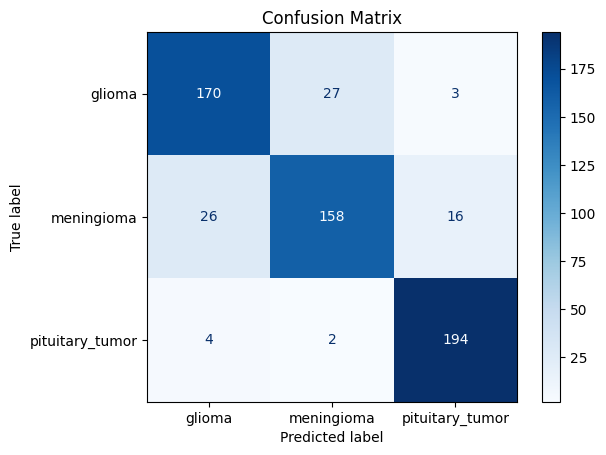

In [103]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model1.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


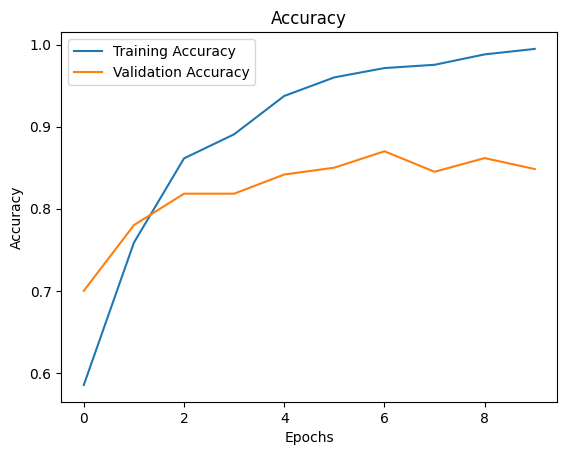

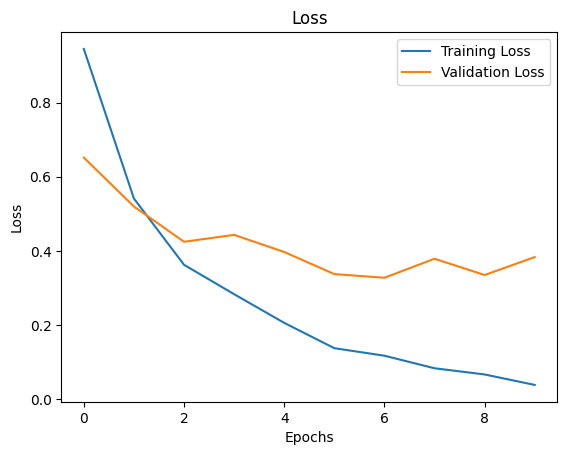

In [105]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model1.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - accuracy: 0.8194 - loss: 0.4504
Test Accuracy: 0.87, Test Loss: 0.33


In [107]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
# Callbacks
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint2 = ModelCheckpoint('model2.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [110]:
history = model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping2, model_checkpoint2]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.5809 - loss: 0.8369
Epoch 1: val_loss improved from inf to 0.66460, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.5898 - loss: 0.8187 - val_accuracy: 0.7000 - val_loss: 0.6646
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.7454 - loss: 0.5465
Epoch 2: val_loss improved from 0.66460 to 0.49190, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - accuracy: 0.7479 - loss: 0.5443 - val_accuracy: 0.7933 - val_loss: 0.4919
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8290 - loss: 0.4162
Epoch 3: val_loss improved from 0.49190 to 0.45582, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - accuracy: 0.8305 - loss: 0.4148 - val_accuracy: 0.8117 - val_loss: 0.4558
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8681 - loss: 0.3207
Epoch 4: val_loss improved from 0.45582 to 0.37775, saving model to model2

In [111]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model2.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.8384 - loss: 0.4153
Test Accuracy: 0.87, Test Loss: 0.33


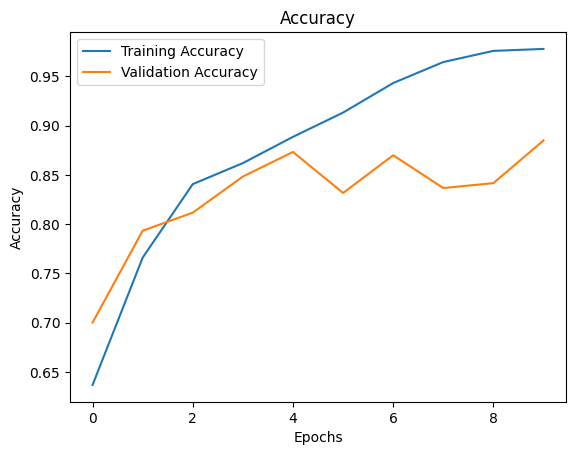

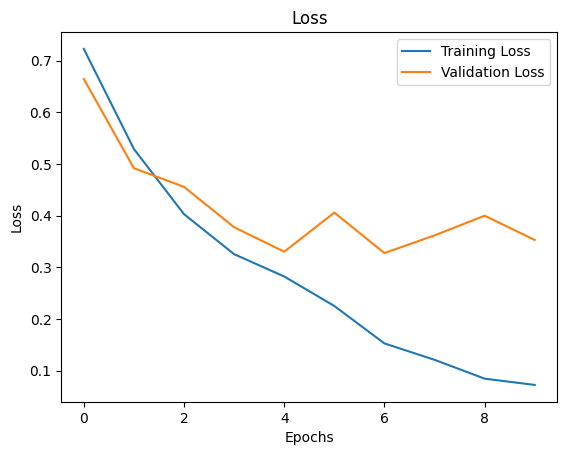

In [112]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step


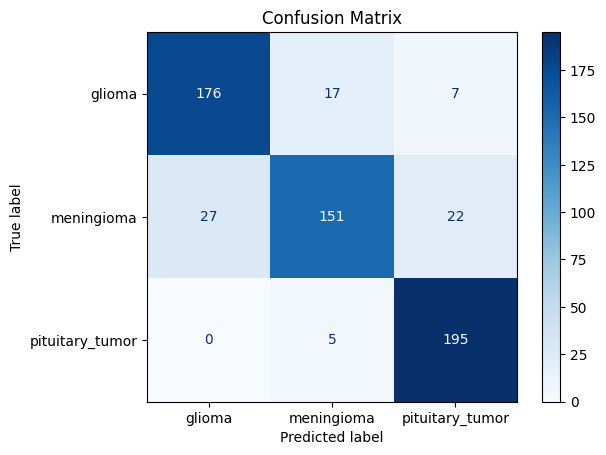

In [114]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [115]:
# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint3 = ModelCheckpoint('model3.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history3 = model3.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping3, model_checkpoint3]
)


Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.5230 - loss: 0.9344
Epoch 1: val_loss improved from inf to 0.72638, saving model to model3.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.5342 - loss: 0.9151 - val_accuracy: 0.6250 - val_loss: 0.7264
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.6620 - loss: 0.6594
Epoch 2: val_loss improved from 0.72638 to 0.64179, saving model to model3.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 299ms/step - accuracy: 0.6657 - loss: 0.6551 - val_accuracy: 0.6850 - val_loss: 0.6418
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.7317 - loss: 0.5578
Epoch 3: val_loss improved from 0.64179 to 0.57415, saving model to model3.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.7339 - loss: 0.5554 - val_accuracy: 0.7500 - val_loss: 0.5742
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.8080 - loss: 0.4618
Epoch 4: val_loss improved from 0.57415 to 0.48504, saving mode

In [116]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model3.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.8479 - loss: 0.3483
Test Accuracy: 0.88, Test Loss: 0.30


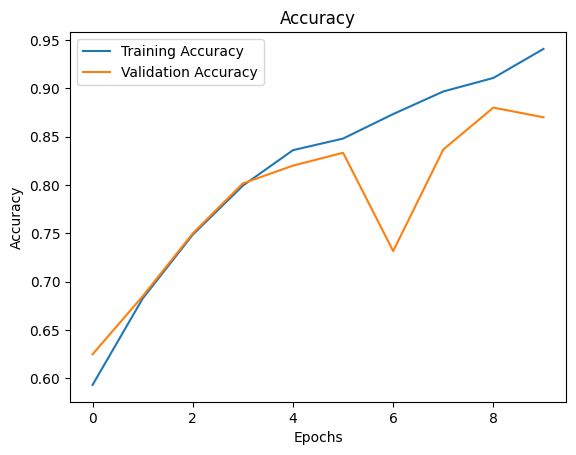

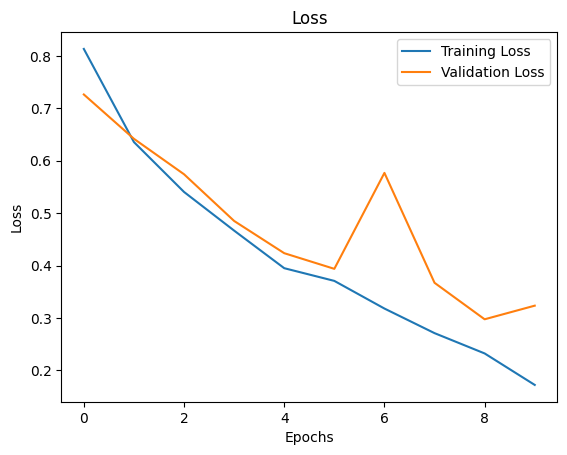

In [117]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step


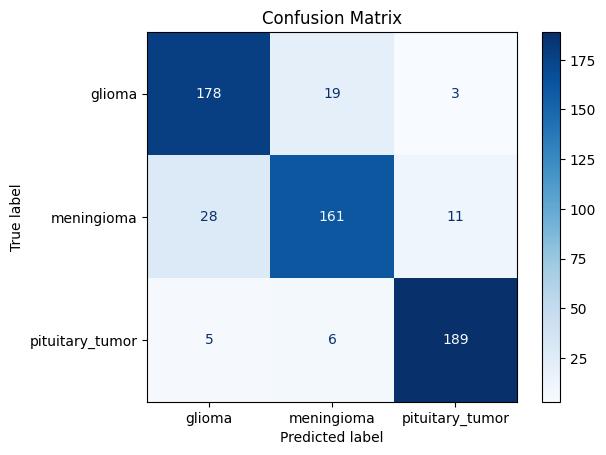

In [118]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model3.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [119]:
# Compile the model
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint4 = ModelCheckpoint('model4.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history4 = model4.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping4, model_checkpoint4]
)


Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.5840 - loss: 0.8372
Epoch 1: val_loss improved from inf to 0.57317, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.5997 - loss: 0.8090 - val_accuracy: 0.7683 - val_loss: 0.5732
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.8492 - loss: 0.4060
Epoch 2: val_loss improved from 0.57317 to 0.43297, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.8491 - loss: 0.4033 - val_accuracy: 0.8050 - val_loss: 0.4330
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.9186 - loss: 0.2540
Epoch 3: val_loss improved from 0.43297 to 0.39924, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.9185 - loss: 0.2523 - val_accuracy: 0.8350 - val_loss: 0.3992
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9241 - loss: 0.1970
Epoch 4: val_loss improved from 0.39924 to 0.35102, saving mode

In [120]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model4.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.8225 - loss: 0.4209
Test Accuracy: 0.88, Test Loss: 0.31


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step


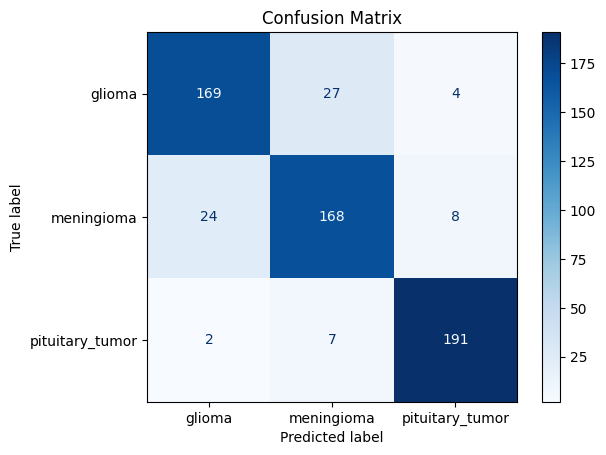

In [121]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model4.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

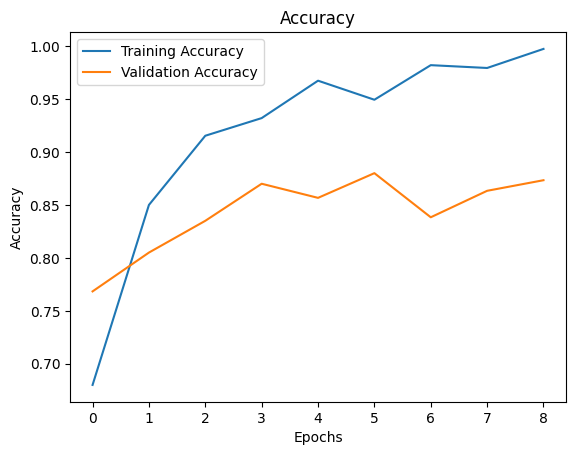

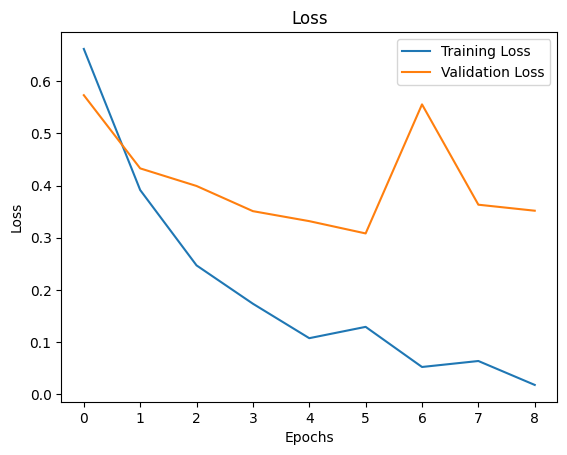

In [122]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [123]:
# Compile the model
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping5 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint5 = ModelCheckpoint('model5.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history5 = model5.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping5, model_checkpoint5]
)

Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.5217 - loss: 0.9279
Epoch 1: val_loss improved from inf to 0.65430, saving model to model5.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.5390 - loss: 0.9002 - val_accuracy: 0.6750 - val_loss: 0.6543
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.7856 - loss: 0.4731
Epoch 2: val_loss improved from 0.65430 to 0.40377, saving model to model5.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 295ms/step - accuracy: 0.7894 - loss: 0.4684 - val_accuracy: 0.8233 - val_loss: 0.4038
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.8914 - loss: 0.2870
Epoch 3: val_loss improved from 0.40377 to 0.37011, saving model to model5.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 295ms/step - accuracy: 0.8896 - loss: 0.2892 - val_accuracy: 0.8367 - val_loss: 0.3701
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9398 - loss: 0.1775
Epoch 4: val_loss did not improve from 0.37011
47/47 ━━━━━━━━━━

In [124]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model5.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.7766 - loss: 0.6287
Test Accuracy: 0.88, Test Loss: 0.36


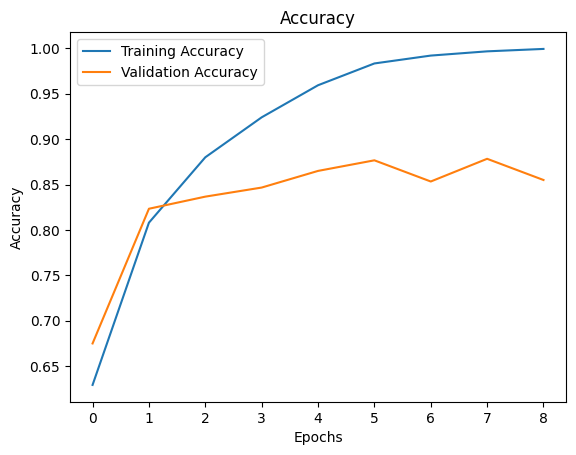

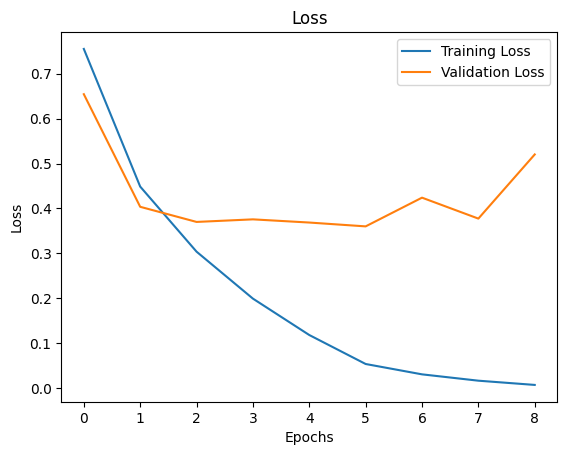

In [125]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step


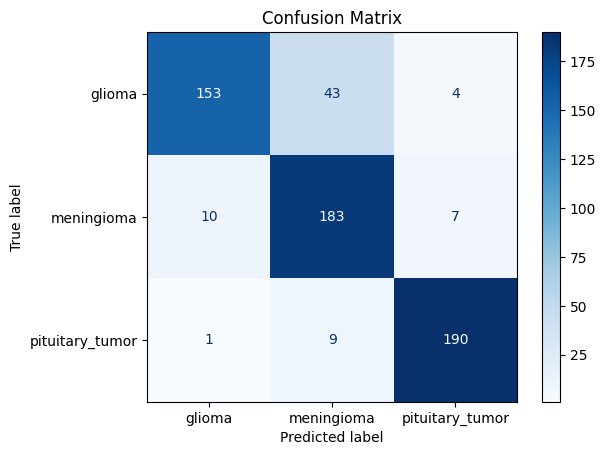

In [127]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model5.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [128]:
# Compile the model
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping6 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint6 = ModelCheckpoint('model6.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history6 = model6.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping6, model_checkpoint6]
)

Epoch 1/10
43/47 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.5108 - loss: 0.8967
Epoch 1: val_loss improved from inf to 0.66694, saving model to model6.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 364ms/step - accuracy: 0.5193 - loss: 0.8824 - val_accuracy: 0.6717 - val_loss: 0.6669
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6926 - loss: 0.6068
Epoch 2: val_loss improved from 0.66694 to 0.58925, saving model to model6.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.6930 - loss: 0.6062 - val_accuracy: 0.7533 - val_loss: 0.5892
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8232 - loss: 0.4486
Epoch 3: val_loss improved from 0.58925 to 0.41546, saving model to model6.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 298ms/step - accuracy: 0.8231 - loss: 0.4484 - val_accuracy: 0.8483 - val_loss: 0.4155
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.8657 - loss: 0.3572
Epoch 4: val_loss did not improve from 0.41546
47/47 ━━━━━━━━━━

In [129]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model6.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.8543 - loss: 0.3924
Test Accuracy: 0.91, Test Loss: 0.25


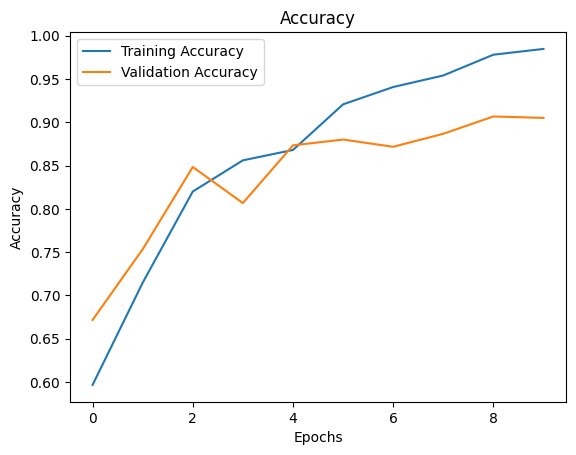

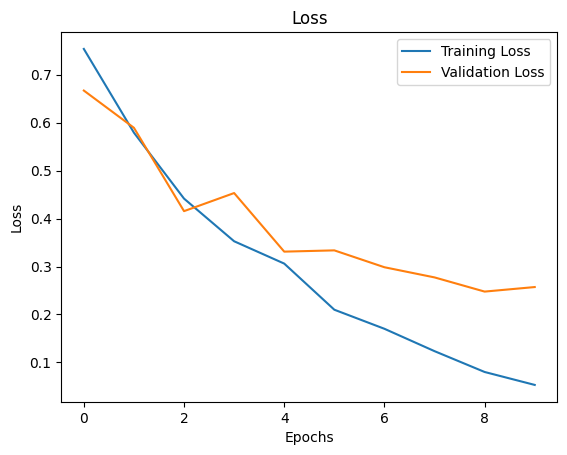

In [130]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step


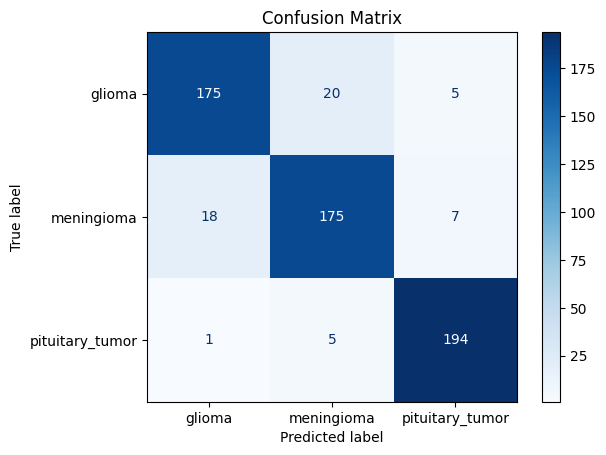

In [132]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model6.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [133]:
# Compile the model
model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping7 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint7 = ModelCheckpoint('model7.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history6 = model7.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping7, model_checkpoint7]
)

Epoch 1/10
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.5998 - loss: 0.8480
Epoch 1: val_loss improved from inf to 0.64094, saving model to model7.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - accuracy: 0.6033 - loss: 0.8400 - val_accuracy: 0.6800 - val_loss: 0.6409
Epoch 2/10
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7522 - loss: 0.5466
Epoch 2: val_loss improved from 0.64094 to 0.46506, saving model to model7.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.7533 - loss: 0.5438 - val_accuracy: 0.8133 - val_loss: 0.4651
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8246 - loss: 0.4066
Epoch 3: val_loss improved from 0.46506 to 0.40134, saving model to model7.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.8248 - loss: 0.4062 - val_accuracy: 0.8583 - val_loss: 0.4013
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.8954 - loss: 0.2708
Epoch 4: val_loss did not improve from 0.40134
47/47 ━━━━━━━━━━

In [134]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model7.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.8398 - loss: 0.4034
Test Accuracy: 0.89, Test Loss: 0.28


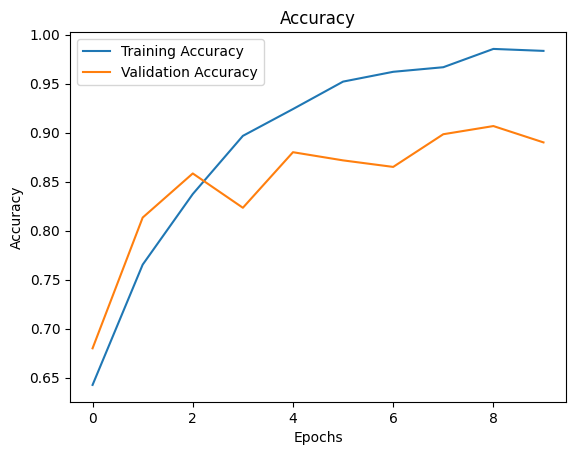

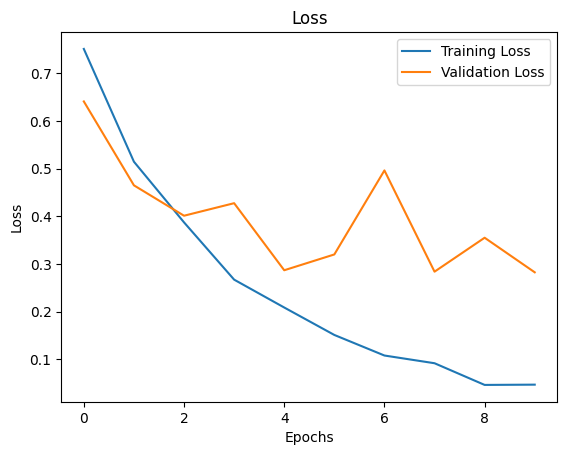

In [135]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step


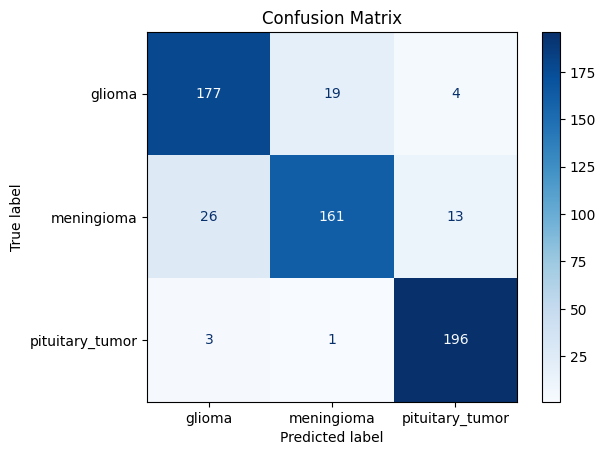

In [136]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model7.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()